In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv('food_orders_new_delhi.csv')
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [32]:
df.isnull().sum()

Order ID                  0
Customer ID               0
Restaurant ID             0
Order Date and Time       0
Delivery Date and Time    0
Order Value               0
Delivery Fee              0
Payment Method            0
Discounts and Offers      0
Commission Fee            0
Payment Processing Fee    0
Refunds/Chargebacks       0
dtype: int64

In [33]:
df.dtypes

Order ID                   int64
Customer ID               object
Restaurant ID             object
Order Date and Time       object
Delivery Date and Time    object
Order Value                int64
Delivery Fee               int64
Payment Method            object
Discounts and Offers      object
Commission Fee             int64
Payment Processing Fee     int64
Refunds/Chargebacks        int64
dtype: object

In [34]:
from datetime import datetime

In [35]:
# Converting Date and Time to datetime type
df['Order Date and Time']=pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time']=pd.to_datetime(df['Delivery Date and Time'])

In [36]:
# Defining a function to seperate the numerical value
def discount(x):
    if '%' in x:
        x=x.split('%')
        x=x[0]
        return float(x)
    elif 'off' in x:
        x=x.split(' ')
        x=x[0]
        return float(x)
    else:
        return 0.0

In [37]:
# Applied the function to extract the numerical value from the column
df['Discounts and Offers']=df['Discounts and Offers'].apply(discount)

In [38]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5.0,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10.0,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15.0,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.0,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.0,130,50,0


In [40]:
# Creating a new column by calculating the Discount percentage
df['Discount Amount']=df.apply(lambda x: (x['Order Value']*x['Discounts and Offers']/100)
                                if (x['Discounts and Offers']>1)
                                else x['Discounts and Offers'],axis=1)

In [41]:
# Calculating the total cost and profit for Food Delivery
df['Total Cost']=df['Delivery Fee']+df['Payment Processing Fee']+df['Discount Amount']
df['Profit']=df['Commission Fee']-df['Total Cost']
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Amount,Total Cost,Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5.0,150,47,0,95.70,142.70,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10.0,198,23,0,98.60,161.60,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15.0,195,45,0,140.55,215.55,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.0,146,27,0,0.00,77.00,69.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.0,130,50,0,996.00,1076.00,-946.00


In [44]:
total_profit=df['Profit'].sum()
total_revenue=df['Commission Fee'].sum()
total_cost=df['Total Cost'].sum()
total_orders=df['Order ID'].value_counts().sum()

In [46]:
overall_measures={
    'Total Profit':total_profit,
    'Total Discount':total_discount,
    'Total Cost':total_cost,
    'Total Revenue':total_revenue
}
print(overall_measures)

{'Total Profit': -105719.85, 'Total Discount': 174257.85, 'Total Cost': 232709.85, 'Total Revenue': 126990}


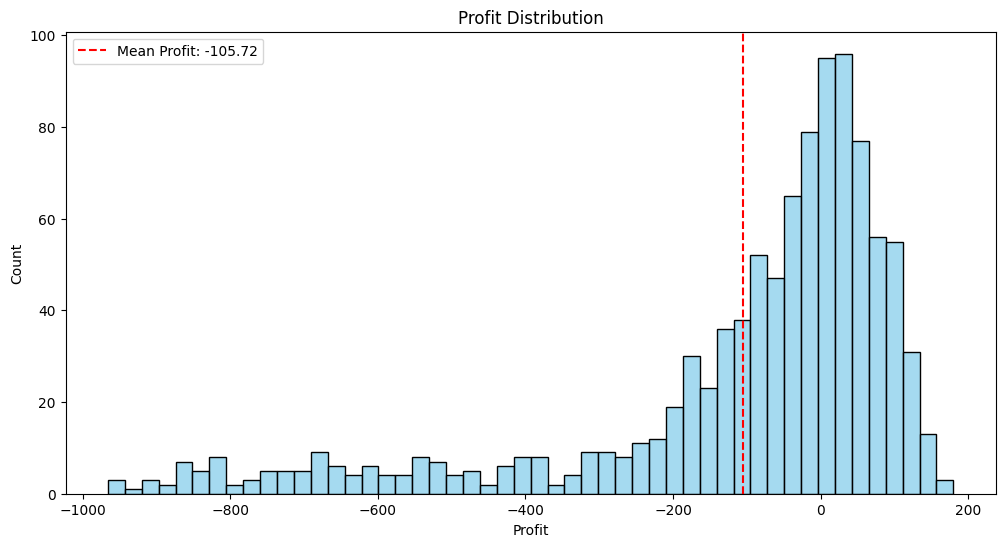

In [49]:
# Plotting a histogram to see profit distribution from mean profit 

plt.figure(figsize=(12,6))
x=df['Profit'].mean()
sns.histplot(df['Profit'],bins=50,color='skyblue')
plt.title('Profit Distribution')
plt.axvline(x,color='red',linestyle='--',label=f'Mean Profit: {round(x,2)}')
plt.legend()
plt.show()

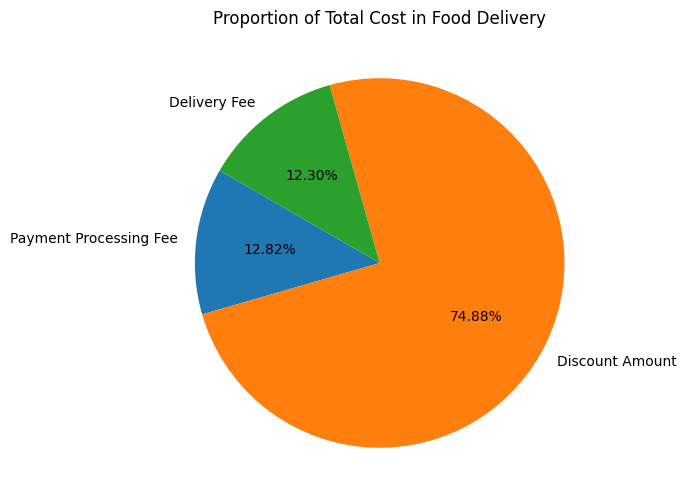

In [58]:
label=df[['Payment Processing Fee','Discount Amount','Delivery Fee']].sum()
plt.figure(figsize=(12,6))
plt.pie(label,labels=label.index,autopct='%1.2f%%',startangle=150)
plt.title('Proportion of Total Cost in Food Delivery')
plt.show()

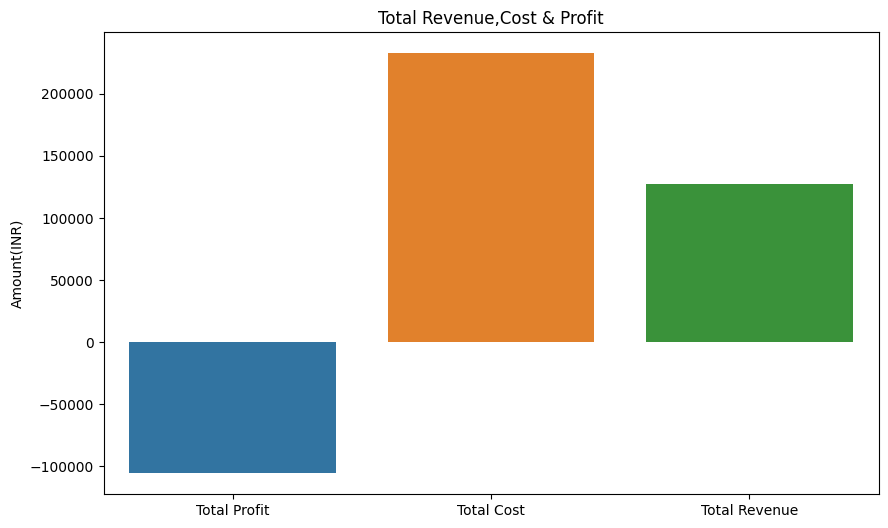

In [66]:
# Bar chart to represent the Total profit,Total Cost and Total Revenue

plt.figure(figsize=(10,6))
totals=['Total Profit','Total Cost','Total Revenue']
values=[total_profit,total_cost,total_revenue]
sns.barplot(x=totals,y=values)
plt.title('Total Revenue,Cost & Profit')
plt.ylabel('Amount(INR)')
plt.show()

In [68]:
# Extracting all the rows having Positive profit
positive_profit=df[df['Profit']>0]

In [72]:
# Calculating the discount percentage for all rows having positive profit
positive_profit['estimated_dcnt_pct']=(positive_profit['Discount Amount']/positive_profit['Order Value'])*100
positive_profit['estimated_cmmsn_pct']=(positive_profit['Commission Fee']/positive_profit['Order Value'])*100

C:\Users\tr21\AppData\Local\Temp\ipykernel_9240\2490887372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_profit['estimated_dcnt_pct']=(positive_profit['Discount Amount']/positive_profit['Order Value'])*100
C:\Users\tr21\AppData\Local\Temp\ipykernel_9240\2490887372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_profit['estimated_cmmsn_pct']=(positive_profit['Commission Fee']/positive_profit['Order Value'])*100


In [75]:
# Calculating the avg discount and commission 
avg_dscnt=positive_profit['estimated_dcnt_pct'].mean()
avg_cmmsn=positive_profit['estimated_cmmsn_pct'].mean()

In [76]:
avg_dscnt,avg_cmmsn

(5.867469879518072, 30.508436145149435)

In [80]:
# calculating the new discount and commission amount 

df['estimated_discount_amount']=df['Order Value']*(round(avg_dscnt)/100)
df['estimated_cmmsn_amount']=df['Order Value']*(round(avg_cmmsn)/100)

In [81]:
df['Estimated_total_cost']=df['estimated_discount_amount']+df['Payment Processing Fee']+df['Delivery Fee']
df['Estimated_profit']=df['estimated_cmmsn_amount']-df['Estimated_total_cost']

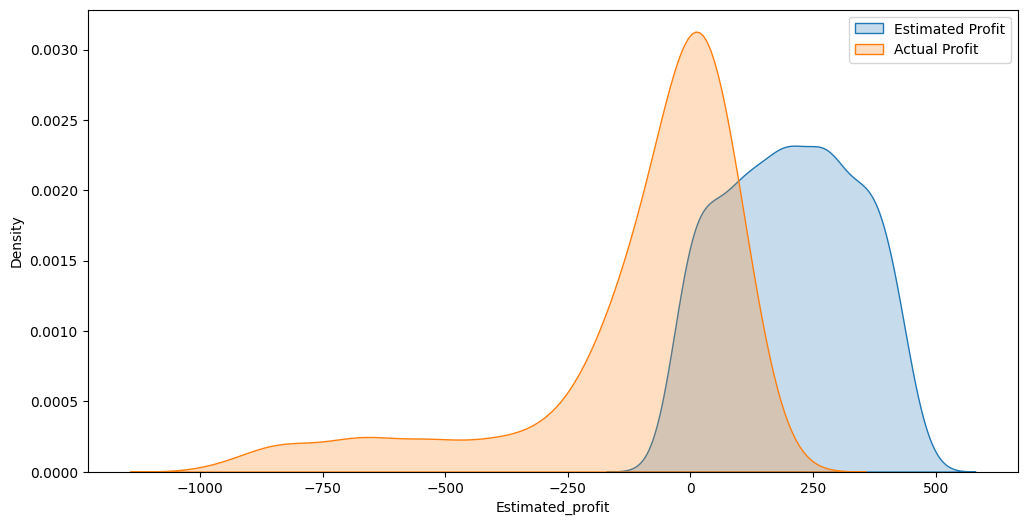

In [84]:
# Plotting a KDE plot for actual and Predicted Profit

plt.figure(figsize=(12,6))
sns.kdeplot(df['Estimated_profit'],fill=True,label='Estimated Profit')
sns.kdeplot(df['Profit'],fill=True,label='Actual Profit')
plt.legend()
plt.show()